# CAVEAT
The following instruction **does not work for 3D plots**:
```
ax.set_aspect(aspect = 'equal')
```

# Imports

In [1]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from skimage import io

# Allow the interactive rotation of 3D scatter plots in jupyter notebook
import sys    
import os    
file_name =  os.path.basename(sys.argv[0])
#print(file_name == 'ipykernel_launcher.py') # This basicaly asks whether this file is a jupyter notebook?
if __name__ == "__main__":
    if file_name == 'ipykernel_launcher.py': # Run only in .ipynb, not in exported .py scripts
        get_ipython().run_line_magic('matplotlib', 'notebook') # Equivalent to ''%matplotlib notebook', but it is also understood by .py scripts
        
import data_loading
from functions_data_processing import get_variables_from_vertex_full_Dataframe

# 1st DataSet - RendersTowelWall
Towel Wall hanging from a single place

# Choose sequence and animation frame

In [2]:
sequence_name = 'TowelWall'
animation_frame = '00001'

# Show a 2D animation frame (i.e., an RGB of a towel)

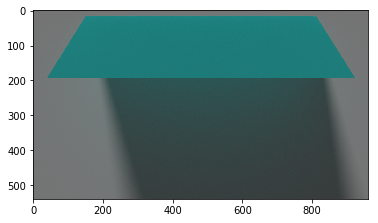

In [3]:
# Showing the 2D animation frame
plt.figure()
image = io.imread('Renders' + sequence_name + '/' + str(int(animation_frame)) + '.png')
plt.imshow(image)
plt.show()

In [4]:
# # Showing the 2D animation frame
# # It opens in a viewer

# #import Image
# from PIL import Image

# image = Image.open('Renders' + sequence_name + '/' + str(int(animation_frame)) + '.png')
# #print('Renders' + sequence_name + '/' + str(int(animation_frame)) + '.png')
# image.show()

In [5]:
# # Showing the 2D animation frame
# # It opens within python

# fig = plt.figure()
# plt.imshow('Renders' + sequence_name + '/' + str(int(animation_frame)) + '.png')

In [6]:
# # Showing the 2D animation frame
# # It opens in a viewer with details of pixel coordinates and RGB components

# import cv2
 
# image = cv2.imread('Renders' + sequence_name + '/' + str(int(animation_frame)) + '.png')
# print(type(image))
  
# cv2.imshow('Test image',image)
# cv2.waitKey(0) # Press any key to continue. Dangerous: if you close the image manually, it gets frozen
# cv2.destroyAllWindows()

# Show vertices, faces and normals of 3D reconstruction
(in 3D world coordinates)

In [7]:
# Load the vertices files disregarding the string '# ' at the beginning of the file
print('Recall:\n\'occluded = 1\' means the vertex is occluded\n\'occluded = 0\' means the vertex is visible\n')

f = open('Renders' + sequence_name + '/vertices_' + animation_frame + '.txt', 'r')
line1 = f.readline()
# print(type(line1))
# print(line1)
# print(line1.replace('# ', ''))
# print(line1.replace('# ', '').split())
df_vertices_all_data = pd.read_csv(f, sep = ' ',  names = line1.replace('# ', '').split())
print(df_vertices_all_data.head())

Recall:
'occluded = 1' means the vertex is occluded
'occluded = 0' means the vertex is visible

   occluded    u    v         d         x         y         z        nx  \
0         0   40  194  4.757699 -1.999481 -1.749941  1.803126 -0.002964   
1         0  923  194  4.757699  1.999481 -1.749941  1.803126 -0.002964   
2         0  151   16  6.363372 -1.999481 -0.144268  2.995524 -0.002964   
3         0  811   16  6.363372  1.999481 -0.144268  2.995524 -0.002964   
4         0  481  194  4.757699 -0.002964 -1.749941  1.803126 -0.002964   

         ny        nz  
0 -0.740467  3.798361  
1 -0.740467  3.798361  
2 -0.740467  3.798361  
3 -0.740467  3.798361  
4 -0.740467  3.798361  


In [8]:
# Extract the x, y, z coordinates of the vertices
df_X = df_vertices_all_data['x']
df_Y = df_vertices_all_data['y']
df_Z = df_vertices_all_data['z']
# print(df_X.dtype)
# print(df_X.head())
# print()

X = df_X.values
Y = df_Y.values
Z = df_Z.values
# print(X.dtype)
# print(X[0:5])

# print(X.size)

## 3D scatter plot of the vertices in world coordinates

xlim: -2.1994291 2.1994291
ylim: -1.83022465 -0.06398435000000001
zlim: 1.7435060999999998 3.0551439


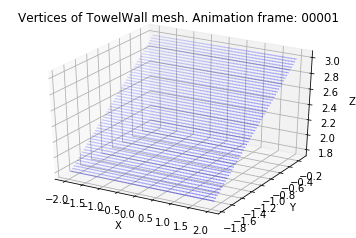

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z, c='b', marker='o', s=0.05)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Vertices of ' + sequence_name + ' mesh. Animation frame: ' + animation_frame)

xmin, xmax = plt.xlim() # return the current xlim
ymin, ymax = plt.ylim() 
zmin, zmax = ax.set_zlim() 
print('xlim:', xmin, xmax)
print('ylim:', ymin, ymax)
print('zlim:', zmin, zmax)

#ax.set_aspect(aspect = 'equal')

plt.show()

fig.savefig('VisualizationTest/vertices_' + sequence_name + '_' + animation_frame + '.png')

## 3D plot of the faces of the mesh in world coordinates

In [10]:
# Load the faces file.
# Each face is represented by 4 numbers in a row.
# Each of these numbers represent a vertex.
# Vertices are ordered by row in any file of the form 'RendersTowelWall/vertices_*****.txt'
# There is no heading, so I will import it directly as a numpy array, rather than as a panda DataFrame
from numpy import genfromtxt
faces = genfromtxt('Renders' + sequence_name + '/faces_mesh.txt', delimiter=' ')
# print(faces[0:5, :])
faces = faces.astype(int)
# print(faces[0:5, :])

In [11]:
# In the faces file, the vertices are indexed starting from 0
num_vertices = X.size
print('number of vertices = ' + str(num_vertices))
# print('min_index in faces file = ' + str(np.min(faces))) # = 0
# print('max_index in faces file = ' + str(np.max(faces))) # = X.size - 1

number of vertices = 5356


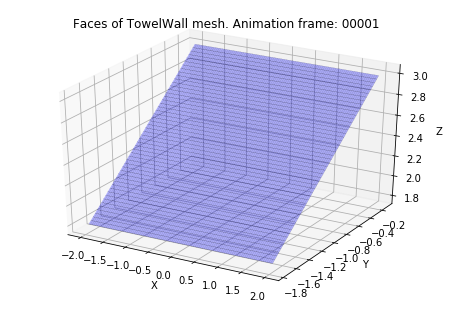

In [12]:
# 3D plot of the faces of the mesh
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

fig = plt.figure()
ax = Axes3D(fig)

for face in faces:
    x = X[face]
    y = Y[face]
    z = Z[face]
    #print(type(x))
    #print(x)
    
    verts = [list(zip(x, y, z))]
    #print(verts)
    #print(type(verts))
    poly3d = Poly3DCollection(verts, linewidths=1)
    poly3d.set_alpha(0.3) # if you don't set alpha individually and before settin facecolor, it doesn't work
    poly3d.set_facecolor('b')
    ax.add_collection3d(poly3d)

    ax.add_collection3d(Line3DCollection(verts, colors='k', linewidths=0.2, linestyles=':'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_zlim([zmin, zmax])

#ax.set_aspect(aspect = 'equal')

plt.title('Faces of ' + sequence_name + ' mesh. Animation frame: ' + animation_frame)

plt.show()

fig.savefig('VisualizationTest/meshFaces_' + sequence_name + '_' + animation_frame + '.png')

## Plot the normal vectors to the mesh at the vertices in world coordinates

In [13]:
# Extract the nx, ny, nz normal vectors to the surface at the vertices
df_nX = df_vertices_all_data['nx']
df_nY = df_vertices_all_data['ny']
df_nZ = df_vertices_all_data['nz']
# print(df_nX.dtype)
# print(df_nX.head())
# print()

nX = df_nX.values
nY = df_nY.values
nZ = df_nZ.values
# print(nX.dtype)
# print(nX[0:5])

# print(nX.size)

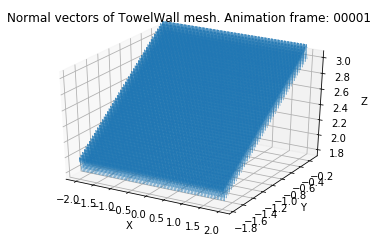

In [14]:
# Plot the normal vectors to the mesh at the vertices in world coordinates
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.quiver(X, Y, Z, nX, nY, nZ, length=0.2, normalize=True, linewidths = 0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_zlim([zmin, zmax])

#ax.set_aspect(aspect = 'equal')

plt.title('Normal vectors of ' + sequence_name + ' mesh. Animation frame: ' + animation_frame)

plt.show()

fig.savefig('VisualizationTest/meshNormals_' + sequence_name + '_' + animation_frame + '.png')

## 3D scatter plot of the vertices coloured by visibility
(in world coordinates)

In [15]:
# # 3D scatter plot of the vertices coloured by visibility
# # (without legend)

# # Extract the nx, ny, nz normal vectors to the surface at the vertices
# df_occluded = df_vertices_all_data['occluded']
# # print(df_occluded.dtype)
# # print(df_occluded.head())
# # print()

# occluded_values = df_occluded.values
# # print(occluded_values.dtype)
# # print(occluded_values[0:5])

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(X, Y, Z, c=occluded_values, marker='o', s=0.5)

# # ax.scatter(X, Y, Z, c=occluded_values, marker='o', s=0.5, label=['visible', 'occluded'])
# # ax.legend()

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# plt.title('Vertex visibility of ' + sequence_name + ' mesh. Animation frame: ' + animation_frame)

# plt.show()

# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
# ax.set_zlim([zmin, zmax])

# fig.savefig('VisualizationTest/vertex_visibility_' + sequence_name + '_' + animation_frame + '.png')

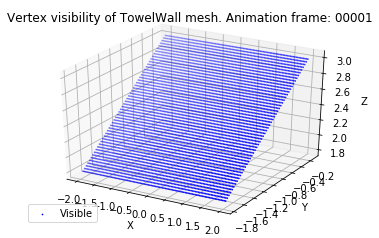

In [16]:
# 3D scatter plot of the vertices coloured by visibility
# (with legend)

# Extract the nx, ny, nz normal vectors to the surface at the vertices
df_occluded = df_vertices_all_data['occluded']
# print(df_occluded.dtype)
# print(df_occluded.head())
# print()

occluded_values = df_occluded.values
# print(occluded_values.dtype)
# print(occluded_values[0:5])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

unique = list(set(occluded_values))
#colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
colors= ['b', 'y']
for i, un in enumerate(unique):
    xi = [X[j] for j  in range(len(X)) if occluded_values[j] == un]
    yi = [Y[j] for j  in range(len(Y)) if occluded_values[j] == un]
    zi = [Z[j] for j  in range(len(Z)) if occluded_values[j] == un]

    ax.scatter(xi, yi, zi, c=colors[i], marker='o', s=0.5)

ax.legend(['Visible', 'Occluded'], loc=3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Vertex visibility of ' + sequence_name + ' mesh. Animation frame: ' + animation_frame)

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_zlim([zmin, zmax])

#ax.set_aspect(aspect = 'equal')

plt.show()


fig.savefig('VisualizationTest/vertex_visibility_' + sequence_name + '_' + animation_frame + '.png')

# Plot camera position
(in 3D world coordinates)

In [17]:
# Load camera position and orientation

# I have created the following document by removing everything from the camera parameters except for the RT matrix
camera_RT = genfromtxt('VisualizationTest/' + sequence_name + '_RTmatrix.txt', delimiter=' ')
#print(camera_RT)
camera_rotationMatrix = camera_RT[:, 0:-1]
print('Rotation matrix:\n', camera_rotationMatrix)
print()
camera_translation = camera_RT[:, -1]
print('Translation from origin:\n', camera_translation)
print()

print('The camera is outside the previous boxes, since their limits were the following:')
print('xlim:', xmin, xmax)
print('ylim:', ymin, ymax)
print('zlim:', zmin, zmax)

Rotation matrix:
 [[ 1.  0.  0.]
 [ 0.  0. -1.]
 [ 0.  1.  0.]]

Translation from origin:
 [0.007581 1.457993 6.507641]

The camera is outside the previous boxes, since their limits were the following:
xlim: -2.1994291 2.1994291
ylim: -1.83022465 -0.06398435000000001
zlim: 1.7435060999999998 3.0551439


## 3D scatter plot of the vertices coloured by visibility including camera position
Coordinates in the world of the camera center: -R^{-1}*t

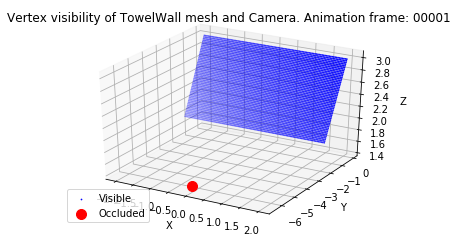

In [18]:
# 3D scatter plot of the vertices coloured by visibility
# Including camera position
# Coordinates in the world of the camera center: -R^{-1}*t

# Extract the 'occluded' mask of the vertices
df_occluded = df_vertices_all_data['occluded']
# print(df_occluded.dtype)
# print(df_occluded.head())
# print()

occluded_values = df_occluded.values
# print(occluded_values.dtype)
# print(occluded_values[0:5])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

unique = list(set(occluded_values))
#colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
colors= ['b', 'y']
for i, un in enumerate(unique):
    xi = [X[j] for j  in range(len(X)) if occluded_values[j] == un]
    yi = [Y[j] for j  in range(len(Y)) if occluded_values[j] == un]
    zi = [Z[j] for j  in range(len(Z)) if occluded_values[j] == un]

    ax.scatter(xi, yi, zi, c=colors[i], marker='o', s=0.5)

# Coordinates in the world of the camera center: -R^{-1}*t
camera_worldCoord_x, camera_worldCoord_y, camera_worldCoord_z = -np.dot(np.linalg.inv(camera_rotationMatrix), camera_translation)
# print(-np.dot(np.linalg.inv(camera_rotationMatrix), camera_translation))
    
ax.scatter(camera_worldCoord_x, camera_worldCoord_y, camera_worldCoord_z, c='r', marker='o', s=100)

ax.legend(['Visible', 'Occluded', 'Camera'], loc=3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#ax.set_aspect(aspect = 'equal')

plt.title('Vertex visibility of ' + sequence_name + ' mesh and Camera. Animation frame: ' + animation_frame)

plt.show()

# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
# ax.set_zlim([zmin, zmax])

fig.savefig('VisualizationTest/vertex_visibility_wCamera' + sequence_name + '_' + animation_frame + '.png')

# 2D scatter plot of (u, v) pixel coordinates
(both visible and ocludded pixels)

In [19]:
# Extract the pixel coordinates u, v of each vertex
df_u = df_vertices_all_data['u']
df_v = df_vertices_all_data['v']
# print(df_u.dtype) # = int64
# print(df_u.head())

u = df_u.values
v = df_v.values
# print(u.dtype) # = int64
# print(u[0:5])
# print(u.size) # = num_vertices

In [20]:
# Extract the pixel coordinates u, v of each visible vertex
df_u_visible = df_u[df_vertices_all_data['occluded'] == 0] # consider only the visible vertices
df_v_visible = df_v[df_vertices_all_data['occluded'] == 0]
# print('Size of df_u =', df_u.size)
# print('Size of df_u_visible =', df_u_visible.size)

u_visible = df_u_visible.values
v_visible = df_v_visible.values

## 2D scatter plot of the pixel location of each vertex
Using both visible and occluded vertices

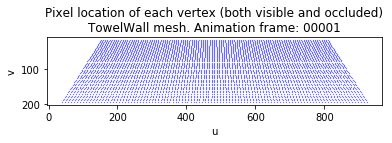

In [21]:
# 2D scatter plot of the pixel location of each vertex
# Using both visible and occluded vertices

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(u, v, c='b', marker='o', s=0.05) # CAVEAT: I had to use '-v'

plt.gca().invert_yaxis() # the origin of the (u, v) coordinates is top-left

ax.set_xlabel('u')
ax.set_ylabel('v')

plt.title('Pixel location of each vertex (both visible and occluded)\n' + sequence_name + ' mesh. Animation frame: ' + animation_frame)

ax.set_aspect(aspect = 'equal')

plt.show()

fig.savefig('VisualizationTest/pixelLocationOfVisibleAndOccludedVertices_' + sequence_name + '_' + animation_frame + '.png')

## 2D scatter plot of the pixel location of each vertex
Using only visible vertices

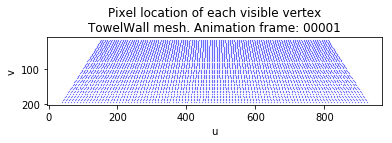

In [22]:
# 2D scatter plot of the pixel location of each vertex
# Using only visible vertices

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(u_visible, v_visible, c='b', marker='o', s=0.05)

plt.gca().invert_yaxis() # the origin of the (u, v) coordinates is top-left

ax.set_xlabel('u')
ax.set_ylabel('v')

plt.title('Pixel location of each visible vertex\n' + sequence_name + ' mesh. Animation frame: ' + animation_frame)

ax.set_aspect(aspect = 'equal')

plt.show()

fig.savefig('VisualizationTest/pixelLocationOfVisibleVertices_' + sequence_name + '_' + animation_frame + '.png')